In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_selection import mutual_info_classif
from yellowbrick.model_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV, StratifiedKFold, StratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier


# pip install -U imbalanced-learn
path = 'data/log2.csv'
data = pd.read_csv(path)
data.shape
data
# print(data[:50])

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


       Action  Count
0       allow  37640
1        deny  14987
2        drop  12851
3  reset-both     54


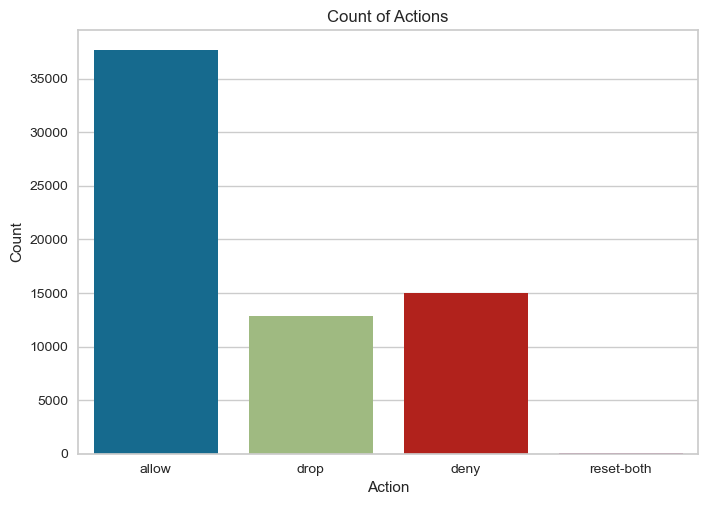

In [23]:
df = pd.DataFrame(data)

time = df["Source Port"]
action = df["Action"].describe()
action

# Calculate the count of each value in the "Action" column
action_counts = df['Action'].value_counts()

# Create a new DataFrame to display the values and their count
action_table = pd.DataFrame({'Action': action_counts.index, 'Count': action_counts.values})

# Display the table
print(action_table)

sns.countplot(x="Action", data=df)

# Set labels and title
plt.xlabel("Action")
plt.ylabel("Count")
plt.title("Count of Actions")

# Display the plot
plt.show()

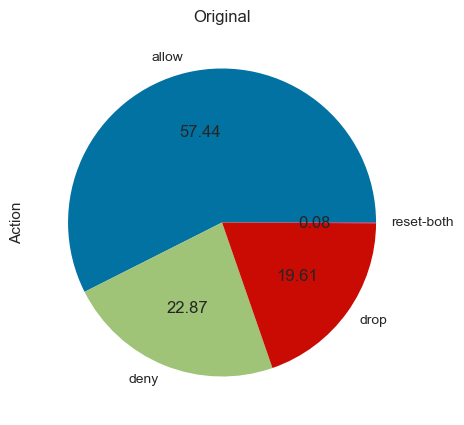

In [18]:
fig, axs = plt.subplots(figsize=(10, 5))
autopct = "%.2f"
df["Action"].value_counts().plot.pie(autopct=autopct, ax=axs)
axs.set_title("Original")
plt.show()

allow         54
deny          54
drop          54
reset-both    54
Name: Action, dtype: int64


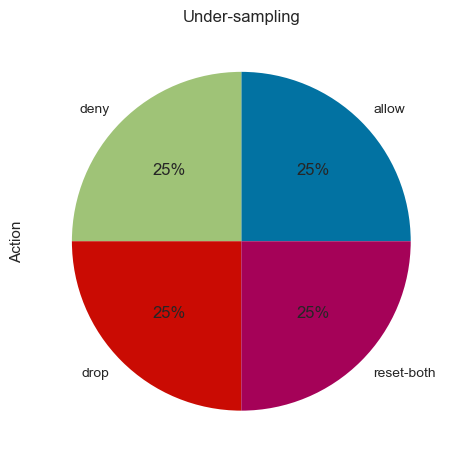

In [20]:
X=df.drop("Action",axis=1)
y=df['Action']



rus = RandomUnderSampler(sampling_strategy="not minority")
X_res_under, y_res_under = rus.fit_resample(X, y)
ax = y_res_under.value_counts().plot.pie(autopct='%.0f%%')
_ = ax.set_title("Under-sampling")
print(y_res_under.value_counts())

allow         37640
drop          37640
deny          37640
reset-both    37640
Name: Action, dtype: int64


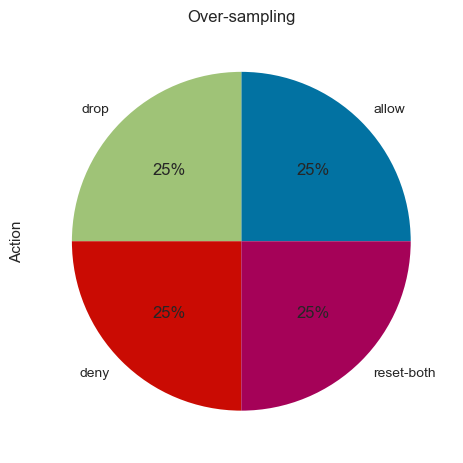

In [21]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res_over, y_res_over = ros.fit_resample(X, y)
ax = y_res_over.value_counts().plot.pie(autopct='%.0f%%')
_ = ax.set_title("Over-sampling")
print(y_res_over.value_counts())

drop          37631
allow         37608
reset-both    37605
deny          37564
Name: Action, dtype: int64


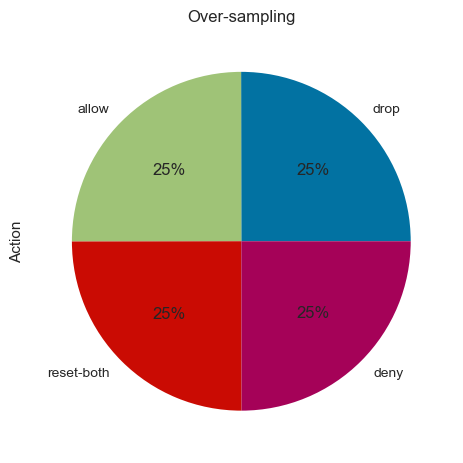

In [22]:
smote_tomek = SMOTETomek(sampling_strategy="auto")
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
ax = y_resampled.value_counts().plot.pie(autopct='%.0f%%')
_ = ax.set_title("Over-sampling")
print(y_resampled.value_counts())

<AxesSubplot:>

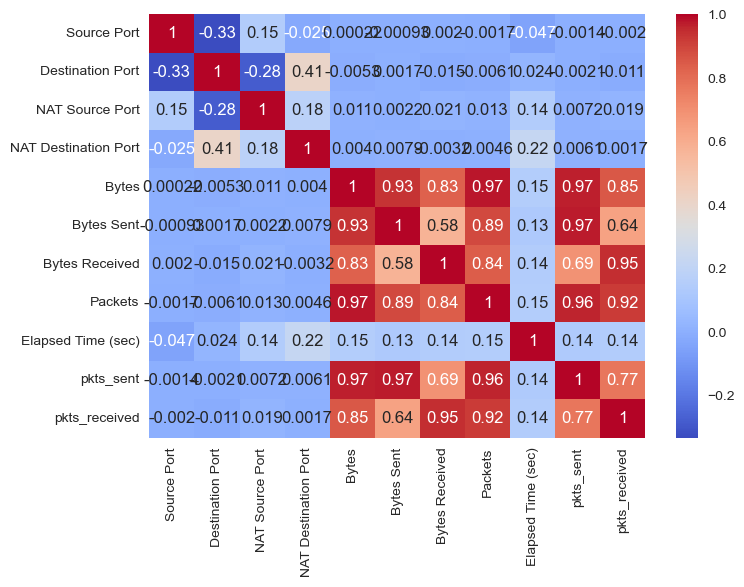

In [51]:
#Correlation Analysis:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

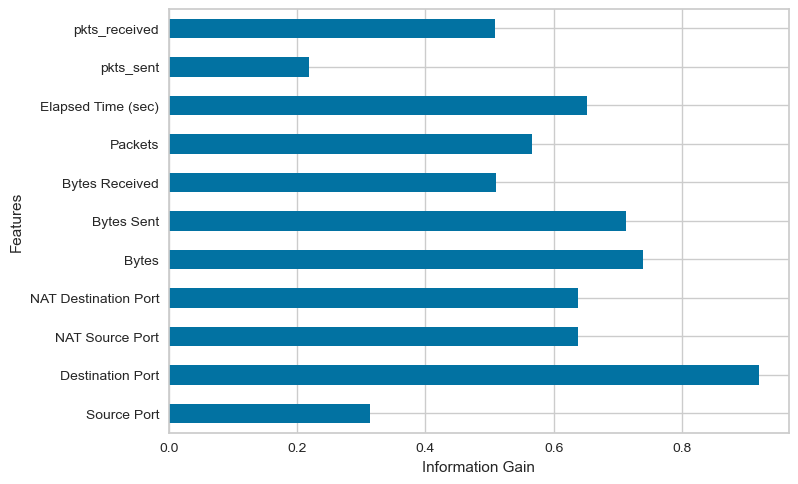

In [52]:
#Information Gain or Mutual Information:

# Separate features and target variable
X_IG = df.drop('Action', axis=1)
y_IG = df['Action']

# Calculate information gain or mutual information scores
scores = mutual_info_classif(X_IG, y_IG)

# Plot feature importance
feature_importance = pd.Series(scores, index=X_IG.columns)
feature_importance.plot(kind='barh')
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.show()

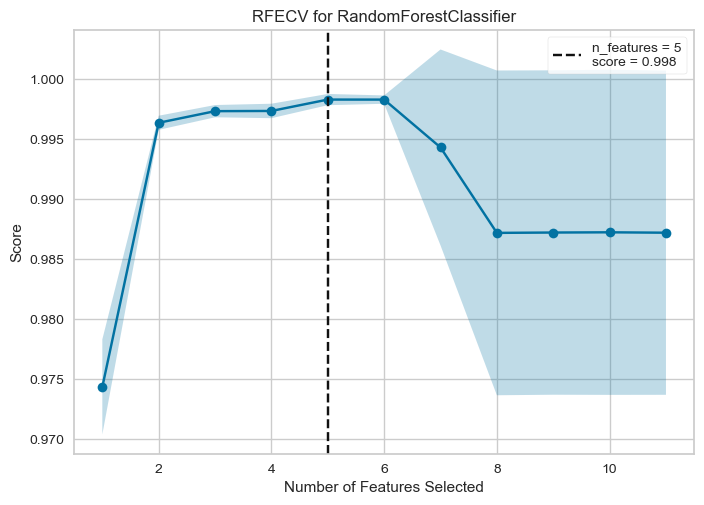

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [53]:
# Load classification dataset
X_yb = data.drop('Action', axis=1)
y_yb = data['Action']

cv = StratifiedKFold(n_splits=5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X_yb, y_yb)
visualizer.show()

In [54]:
x = df.drop(list,axis = 1 )
data2=x

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data2)
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('Explained Variance')
plt.ylabel('Variance')
plt.show()

# Calculate the percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
# plt.bar(range(pca.n_components_), explained_variance_ratio)
plt.plot(range(pca.n_components_), cumulative_explained_variance_ratio, 'r-o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.show()

KeyError: "[<class 'list'>] not found in axis"

In [2]:
df = pd.DataFrame(data)


X=df.drop("Action",axis=1)
y=df['Action']


# Apply undersampling
rus = RandomUnderSampler(sampling_strategy='majority')
X_resampled_under, y_resampled_under = rus.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_resampled_under, y_resampled_under, test_size=0.25, random_state=42)


# Apply oversampling
ros = RandomOverSampler(sampling_strategy='minority')
X_resampled_over, y_resampled_over = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resampled_over, y_resampled_over, test_size=0.25, random_state=42)


# Apply smote_tomek
smote_tomek = SMOTETomek(sampling_strategy="auto")
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_smote_tomek, X_test_smote_tomek, y_train_smote_tomek, y_test_smote_tomek = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)


In [39]:
def model3(clf, features_train, features_test, labels_train, labels_test, train, labels):
    scoring = 'accuracy'
    results = []
    names = []
    times = []
    seed = 42  # Set the seed for reproducibility
    for name, model, param_grid in clf:
        start_time = time.time()
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        if param_grid:
            grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=kfold)
        else:
            grid_search = model
        grid_result = grid_search.fit(train, labels.ravel())
        end_time = time.time()
        results.append(grid_result.best_score_)
        names.append(name)
        times.append(end_time - start_time)
        msg = "%s: %f, Time: %.2f seconds" % (name, grid_result.best_score_, end_time - start_time)
        print(msg)
        print("Best Parameters:", grid_result.best_params_)
        print()

    # Bar plot algorithm comparison
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=names, y=results)
    ax.set_xticklabels(names, rotation=45)
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Accuracy')
    ax.set_title('Algorithm Comparison - Accuracy (Grid Search)')
    plt.tight_layout()
    plt.show()

    # Time taken
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=names, y=times)
    ax.set_xticklabels(names, rotation=45)
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Algorithm Comparison - Time Taken')
    plt.tight_layout()
    plt.show()

/Users/sparrow/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sparrow/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sparrow/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sparrow/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sparrow/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sparrow/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

Support Vector Machine (SVM): 0.928812, Time: 223.10 seconds
Best Parameters: {}

Random Forest: 0.998031, Time: 185.72 seconds
Best Parameters: {'n_estimators': 200}

AdaBoost: 0.948254, Time: 262.31 seconds
Best Parameters: {'n_estimators': 50}

Balanced Random Forest: 0.957929, Time: 116.06 seconds
Best Parameters: {'n_estimators': 100}

Easy Ensemble: 0.875922, Time: 852.67 seconds
Best Parameters: {'n_estimators': 300}

Nearest Centroid: 0.348120, Time: 1.39 seconds
Best Parameters: {}



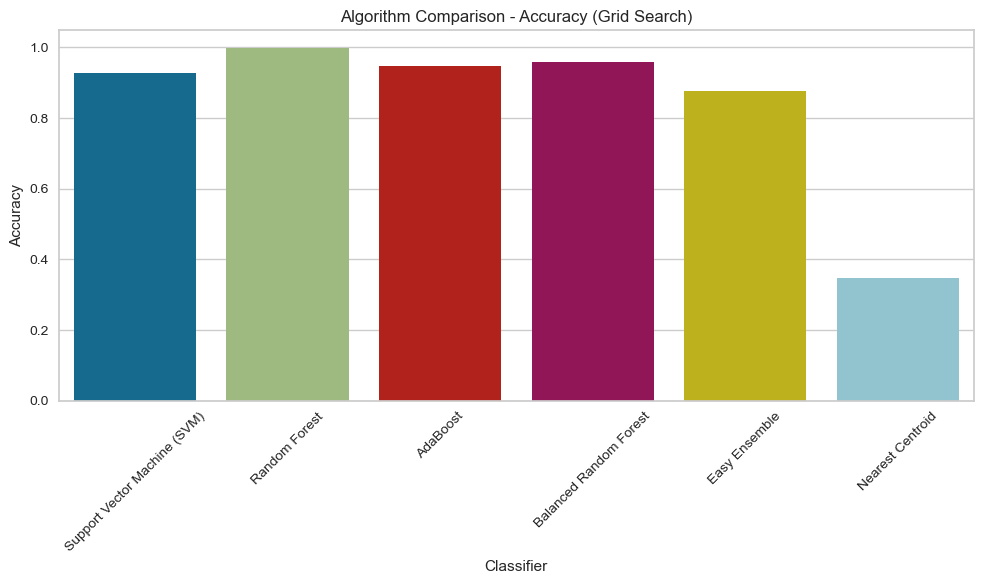

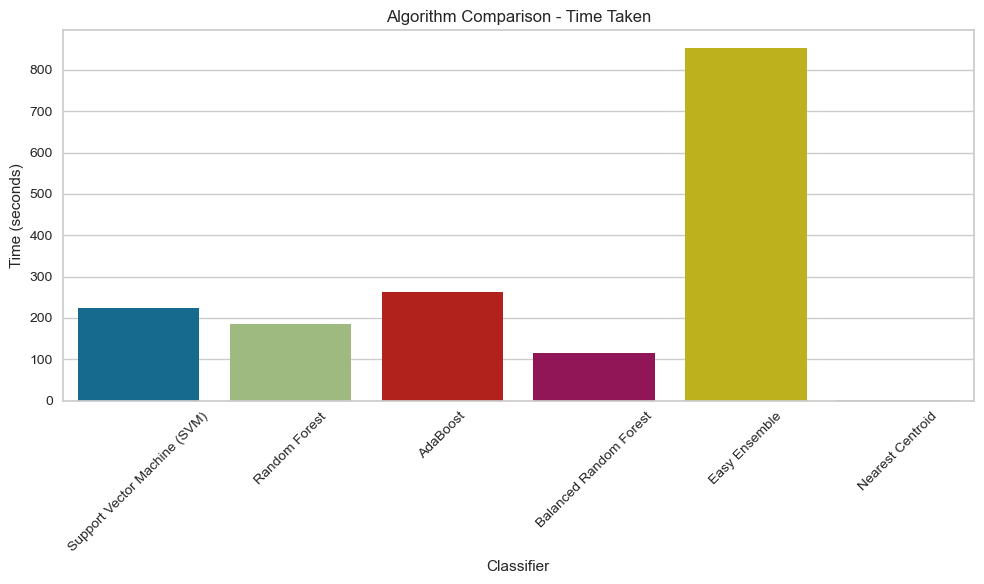

In [48]:
classifiers = [
    ('Support Vector Machine (SVM)', svm.LinearSVC(C=1, loss='hinge', max_iter=1000),{}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300]}),
    ('AdaBoost', AdaBoostClassifier(), {'n_estimators': [50, 100, 150]}),
    ('Balanced Random Forest', BalancedRandomForestClassifier(), {'n_estimators': [100, 200, 300]}),
    ('Easy Ensemble', EasyEnsembleClassifier(), {'n_estimators': [100, 200, 300]}),
    ('Nearest Centroid', NearestCentroid(), {})
]

model3(classifiers, X_train_over, X_test_over, y_train_over, y_test_over, X, y)